In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/Exercise1DataSet.csv")
df

,x,y
0,-4.809264,-92.911272
1,-4.722680,-98.506658
2,-3.852326,-63.212666
3,-3.687668,-51.036538
4,-3.602674,-54.784580
...,...,...
95,6.890595,39.282364
96,7.118811,49.384561
97,7.178848,51.564875
98,7.942389,85.676290


In [3]:
x = np.array(df.x).reshape(-1, 1)
y = df.y.values

In [4]:
x.shape

(100, 1)

In [5]:
y.shape

(100,)

Text(0, 0.5, 'Y')

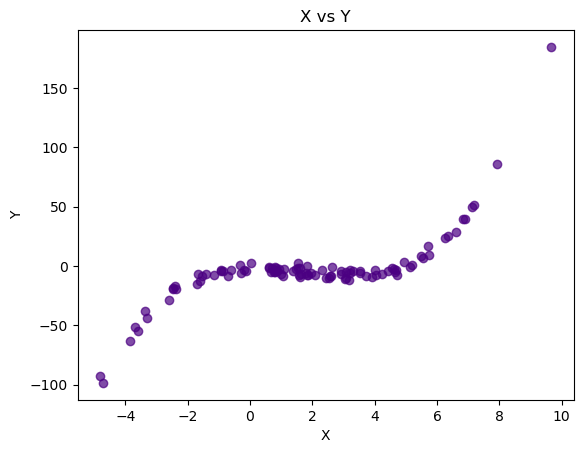

In [6]:
plt.scatter(x, y, marker="o", color="indigo", alpha=0.7)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

In [7]:
# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [8]:
# Splitting train and validation data
x_trainv, x_valid, y_trainv, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=12)

In [9]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)

    x_train_poly = poly_features.fit_transform(x_trainv)
    x_valid_poly = poly_features.fit_transform(x_valid)

    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_trainv)

    y_traing_predict = poly_model.predict(x_train_poly)
    y_valid_predict = poly_model.predict(x_valid_poly)
    
    mse_train = mean_squared_error(y_trainv, y_traing_predict)
    mse_valid = mean_squared_error(y_valid, y_valid_predict)

    return (mse_train, mse_valid, degree)

In [10]:
a = []
for i in range(1, 8):
    a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a, columns= ["Training Error", "Validation Error", "Degree"])
df

,Training Error,Validation Error,Degree
0,481.500330,374.856487,1
1,446.296071,362.636566,2
2,8.976886,5.689167,3
3,8.976548,5.661346,4
4,8.751592,5.868799,5
5,8.660864,6.041903,6
6,7.682670,4.998024,7


In [11]:
df.sort_values("Validation Error")

,Training Error,Validation Error,Degree
6,7.682670,4.998024,7
3,8.976548,5.661346,4
2,8.976886,5.689167,3
4,8.751592,5.868799,5
5,8.660864,6.041903,6
1,446.296071,362.636566,2
0,481.500330,374.856487,1


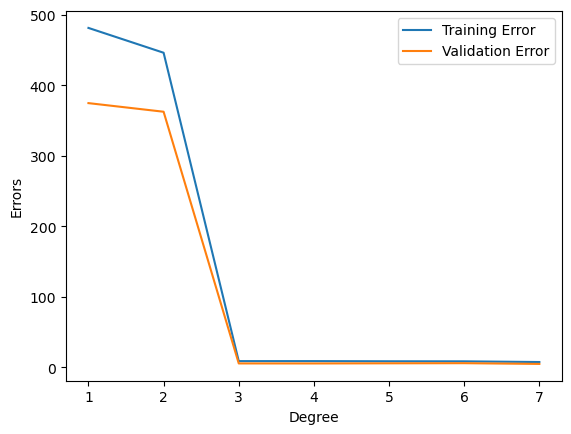

In [12]:
plt.plot(df.Degree, df["Training Error"], label = "Training Error")
plt.plot(df.Degree, df["Validation Error"], label = "Validation Error")
plt.xlabel("Degree")
plt.ylabel("Errors")
plt.legend(loc="best")

In [13]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=7, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_predict = poly_model.predict(x_test_poly)
mean_squared_error(y_test, y_predict)

13.661701823404723

Text(0, 0.5, 'Errors')

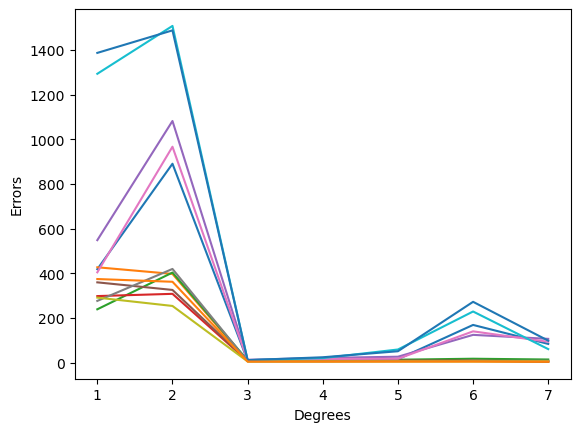

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(1, 13):
    a = []
    x_trainv, x_valid, y_trainv, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=i)
    for j in range(1, 8):
        a.append(create_polynomial_regression_model(j))
    df = pd.DataFrame(a, columns=["Training Error", "Validation Error", "Degree"])
    ax.plot(df["Degree"], df["Validation Error"])
    
ax.set_xlabel("Degrees")
ax.set_ylabel("Errors")

In [15]:
df

,Training Error,Validation Error,Degree
0,481.500330,374.856487,1
1,446.296071,362.636566,2
2,8.976886,5.689167,3
3,8.976548,5.661346,4
4,8.751592,5.868799,5
5,8.660864,6.041903,6
6,7.682670,4.998024,7


# Leave One Out Validation

In [16]:
# Splitting train and test data for LeaveOneOut
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
LeaveOneOutErrors=[]

for train_index, validation_index in loo.split(x_train):
    x_trainv, x_valid = x_train[train_index], x_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    LeaveOneOutErrors.append(create_polynomial_regression_model(5))

df = pd.DataFrame(LeaveOneOutErrors, columns=["Traning Error", "Validation Error", "Degree"])
df

,Traning Error,Validation Error,Degree
0,8.059542,24.070812,5
1,8.325282,0.285836,5
2,8.325149,0.334871,5
3,8.118258,17.194763,5
4,8.303641,2.072676,5
...,...,...,...
75,8.166777,13.411192,5
76,8.183664,12.448743,5
77,8.120118,17.177775,5
78,8.114667,17.889624,5


In [18]:
loo = LeaveOneOut()
LeaveOneOutCV = []

for i in range(1, 8):
    LeaveOneOutErrors=[]
    for train_index, validation_index in loo.split(x_train):
        x_trainv, x_valid = x_train[train_index], x_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        LeaveOneOutErrors.append(create_polynomial_regression_model(i))
        df = pd.DataFrame(LeaveOneOutErrors, columns=["Traning Error", "Validation Error", "Degree"])
        
    LeaveOneOutCV.append([df["Validation Error"].mean(), i])
LeaveOneOutCV_df = pd.DataFrame(LeaveOneOutCV, columns=["Validation Error", "Degree"])
LeaveOneOutCV_df

,Validation Error,Degree
0,522.536143,1
1,615.206270,2
2,10.257541,3
3,12.556636,4
4,15.705177,5
5,34.482614,6
6,19.589947,7


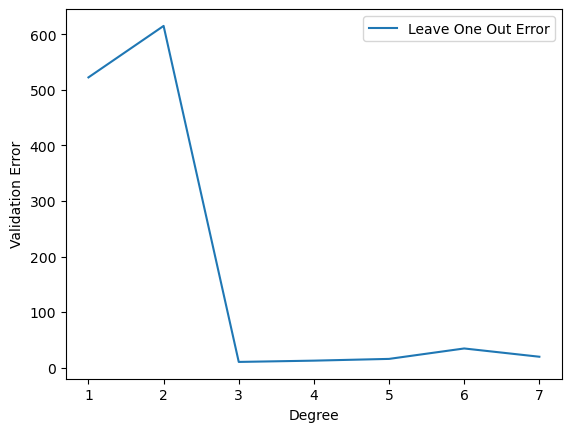

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LeaveOneOutCV_df.Degree, LeaveOneOutCV_df["Validation Error"], label= "Leave One Out Error")
ax.set_xlabel("Degree")
ax.set_ylabel("Validation Error")
ax.legend(loc="best")

In [20]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_pred = poly_model.predict(x_test_poly)
mean_squared_error(y_test, y_pred)

9.569802779249255

# K-Fold Validation

In [21]:
from sklearn.model_selection import KFold

In [22]:
# Splitting train and test data for LeaveOneOut
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [23]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
CVErrors = []

for train_index, validation_index in cv.split(x_train):
    x_trainv, x_valid = x_train[train_index], x_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    CVErrors.append(create_polynomial_regression_model(2))

df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
df

,Traning Error,Validation Error,Degree
0,457.128794,302.181206,2
1,423.814064,451.290607,2
2,252.049337,1400.161591,2
3,465.197494,241.794972,2
4,430.573414,406.104040,2


In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
CVErrorCV = []

for i in range(1, 8):
    CVErrors = []
    for train_index,  validation_index in cv.split(x_train):
        x_trainv, x_valid = x_train[train_index], x_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        CVErrors.append(create_polynomial_regression_model(i))
        df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
    CVErrorCV.append([df["Validation Error"].mean(), i])
    
KFoldCV_df = pd.DataFrame(CVErrorCV, columns=["Validation Error", "Degree"])
KFoldCV_df

,Validation Error,Degree
0,491.023574,1
1,560.306483,2
2,10.320544,3
3,12.012723,4
4,18.650768,5
5,42.742494,6
6,25.709752,7


In [25]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
CVErrors = []

for i in range(1, 8):
    for train_index, validation_index in cv.split(x_train):
        x_trainv, x_valid = x_train[train_index], x_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        CVErrors.append(create_polynomial_regression_model(i))
    df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
    
kfoldCV_by_degree = df.groupby("Degree").mean()
kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
kfoldCV_by_degree[['Degree', 'Validation Error']]

,Degree,Validation Error
0,1,491.023574
1,2,560.306483
2,3,10.320544
3,4,12.012723
4,5,18.650768
5,6,42.742494
6,7,25.709752


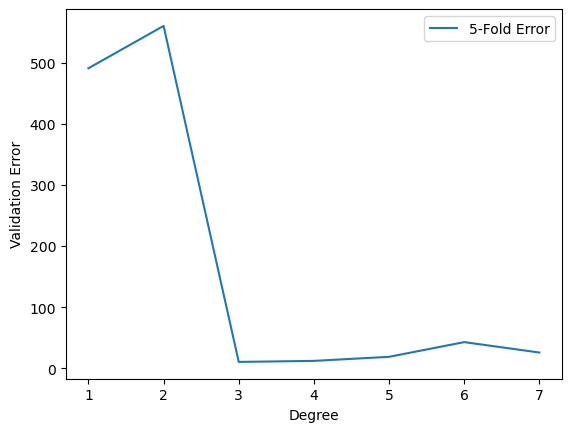

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_degree["Degree"], kfoldCV_by_degree["Validation Error"], label="5-Fold Error")
ax.set_xlabel("Degree")
ax.set_ylabel("Validation Error")
ax.legend(loc="best")

Text(0, 0.5, 'Errors')

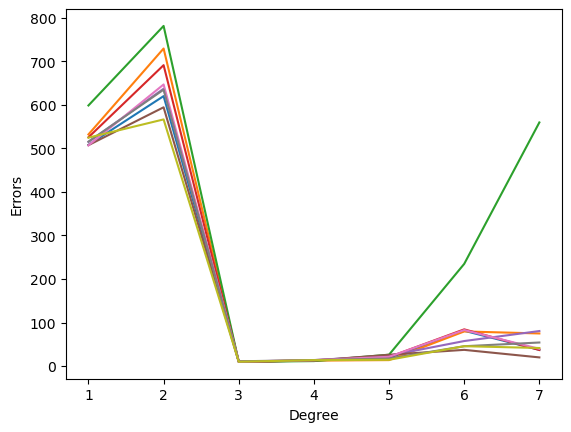

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range (1, 10):
    CVErrors = []
    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    for j in range (1, 8):
        for train_index, validation_index in cv.split(x_train):
            x_trainv, x_valid = x_train[train_index], x_train[validation_index]
            y_trainv, y_valid = y_train[train_index], y_train[validation_index]
            CVErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame(CVErrors, columns=["Traning Error", "Validation Error", "Degree"])
    kfoldCV_by_degree = df.groupby("Degree").mean()
    kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
    ax.plot(kfoldCV_by_degree["Degree"], kfoldCV_by_degree["Validation Error"])
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')

In [28]:
kfoldCV_by_degree[["Degree", "Validation Error"]]

,Degree,Validation Error
0,1,524.520757
1,2,566.379773
2,3,9.935205
3,4,13.544290
4,5,14.397570
5,6,45.623574
6,7,41.462287


In [29]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_predict = poly_model.predict(x_test_poly)
mean_squared_error(y_test, y_predict)

10.422657803430786

In [30]:
#Let's predict all data target
poly_features = PolynomialFeatures(degree=3, include_bias=False)

x_poly = poly_features.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)

all_y_predict = poly_model.predict(x_poly)
mean_squared_error(y, all_y_predict)

8.602520876415438

In [ ]:
plt.scatter(x, y, marker="o", color="indigo", alpha=0.7)
plt.plot(x, all_y_predict, c="red")
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")